# やるべきだけどやってないこと
- モデルの次数と差分階差の情報量基準などを用いた選定
- 当てはめ残差の評価
- モデルの予測精度とナイーブ予測精度の比較
- 評価指標の検討（今回はとりあえずMSEで)

In [ ]:
!pip install yahoo_finance_api2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.12-py3-none-any.whl size=3732 sha256=ff94c18e6fc8b79860bf53fa57d106269f459a3b239596e03f26c94c2bd81413
  Stored in directory: /root/.cache/pip/wheels/04/77/eb/0752708ce59adc39ee235086da5293850b7f9d69e4886d959c
Successfully built yahoo-finance-api2


In [ ]:
#ドライブ設定
PATH_GMOUNT='/content/gdrive'
PATH_MYDRIVE=PATH_GMOUNT+'/My Drive'

#GDriveマウント
from google.colab import drive
drive.mount(PATH_GMOUNT)

Mounted at /content/gdrive


In [ ]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=175f989f1ce7ea63515d237d1d2e69ef318517f5c0bc8264e5b29bb45791a6c5
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [ ]:
# ライブラリのインポート

# from yahoo_finance_api2 import share
# from yahoo_finance_api2.exceptions import YahooFinanceError
import datetime as datetime
import pandas as pd
import numpy as np
import math

import sys
import os

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import japanize_matplotlib

import datetime

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

from IPython.display import display
%matplotlib inline

In [ ]:
# 日本語が表示できるフォントの確認

import matplotlib
# フォントを全て読み込み
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# 描画領域のサイズ調整
plt.figure(figsize=(10,len(fonts)/4))

# フォントの表示
for i, font in enumerate(fonts):
    plt.text(0, i, f"日本語：{font}", fontname=font)

# 見やすいように軸を消す
plt.ylim(0, len(fonts))
plt.axis("off")

plt.show()

In [ ]:
# 日本語表示できるフォントに変更
plt.rcParams['font.family'] = "IPAexGothic"

In [ ]:
my_share = share.Share('GOOGL')
symbol_data = None

try:
    symbol_data = my_share.get_historical(
        share.PERIOD_TYPE_YEAR, 30, # 取得期間
        share.FREQUENCY_TYPE_DAY, 1 #　データ間隔
        )


except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

print('取得データの特徴量(処理前) : ', list(symbol_data.keys()))

NameError: ignored

In [ ]:
def add_datetime_columns(df, column):
  df["date"] = df[column].dt.date
  #df["year"] = pd.Categorical(df[column].dt.year)
  #df["mon"] = pd.Categorical(df[column].dt.month)
  #df["day"] = pd.Categorical(df[column].dt.day)
  #df["hr"] = pd.Categorical(df[column].dt.hour)
  #df["weekday"] = pd.Categorical(df[column].dt.weekday)
  #df["quarter"] = pd.Categorical(df[column].dt.quarter)
  #df["month"] = pd.Categorical(df[column].dt.strtime("%Y-%m"))

  return df

In [ ]:
# データを取得

# DataFrame型に変換
import pandas as pd
df = pd.DataFrame(symbol_data)

ｄｆ["datetime"] = pd.to_datetime(df.timestamp, unit="ms") # タイムスタンプをわかりやすくし、datetimeカラムに

# 期間を指定
df = add_datetime_columns(df, "datetime").drop("datetime", axis = 1)
df["date"] = pd.to_datetime(df["date"])
df = df[df["date"] >= "2019-10-01"]

df = df.drop("timestamp", axis=1)
df = df.reindex(columns=["open", "high",	"low", "close",	"volume", "date"])

df

NameError: ignored

In [ ]:
# 一旦、csvで出力
df.to_csv(f'{PATH_MYDRIVE}/株価データの分析/date/symbol_date.csv', encoding = "shift_jis")

NameError: ignored

In [ ]:
# ファイル名を変更しているから、指定して読み込み
df = pd.read_csv(f'{PATH_MYDRIVE}/株価データの分析/date/symbol_date_191001_221209.csv').drop("Unnamed: 0", axis = 1)
df["date"] = pd.to_datetime(df["date"])
df

,open,high,low,close,volume,date
0,61.124500,61.643002,60.277500,60.299999,24504000,2019-10-01
1,59.825001,59.938000,58.631500,58.896000,33030000,2019-10-02
2,59.167000,59.549999,58.157001,59.471500,28368000,2019-10-03
3,59.714500,60.623001,59.548500,60.548000,24282000,2019-10-04
4,60.349998,60.945499,60.217999,60.412498,17040000,2019-10-07
...,...,...,...,...,...,...
801,99.400002,101.379997,99.000000,99.480003,24405100,2022-12-05
802,99.300003,99.779999,96.419998,96.980003,24910700,2022-12-06
803,96.410004,96.879997,94.720001,94.940002,31045400,2022-12-07
804,95.379997,95.580002,93.449997,93.709999,32213300,2022-12-08


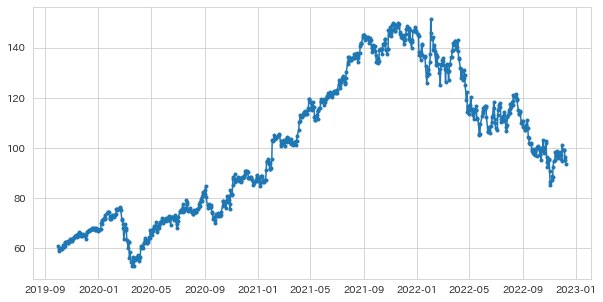

In [ ]:
x = df["date"]
y = df["open"]
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker=".")

In [ ]:
print(df.shape)
print(df.isnull().sum())
display(df.describe(include = "all"))

(806, 6)
open      0
high      0
low       0
close     0
volume    0
date      0
dtype: int64


<ipython-input-9-df780e53ad2c>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include = "all"))


,open,high,low,close,volume,date
count,806.000000,806.000000,806.000000,806.000000,8.060000e+02,806
unique,NaN,NaN,NaN,NaN,NaN,806
top,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2022-12-09 00:00:00
mean,101.334949,102.495350,100.175645,101.349583,3.449576e+07,NaN
std,27.846019,28.022668,27.546052,27.771880,1.536107e+07,NaN
min,52.818501,53.345501,50.443501,52.706501,9.312000e+06,NaN
25%,74.432877,75.266624,73.842247,74.362747,2.445800e+07,NaN


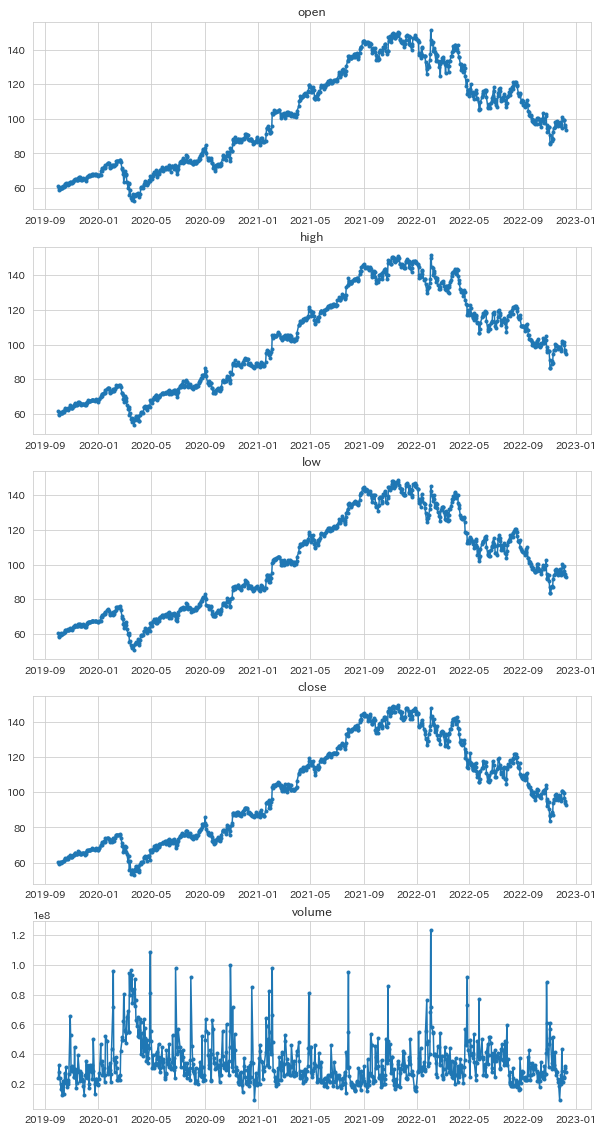

In [ ]:
# 各特徴量の推移を可視化
x = df["date"]

price_li = ['open', 'high', 'low', 'close', 'volume']
fig = plt.figure(figsize=(10, 20))
for i, index in enumerate(price_li):
    y = df[index]
    ax = fig.add_subplot(5, 1, i+1)

    ax.plot(x, y, marker=".")
    plt.title(index)

plt.show()

# 定常化前に自己相関を確認


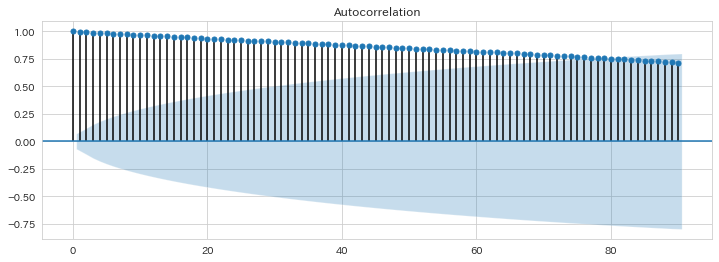

In [ ]:
# 自己相関

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_acf(df["close"], lags=90, ax = ax1)

plt.show() # インライン表示で同じグラフが2個出でる？ので回避

- 70~80日前までのデータとはある程度相関ありか？
- 今のデータは上記の期間ぐらいの影響は受けている可能性がある？

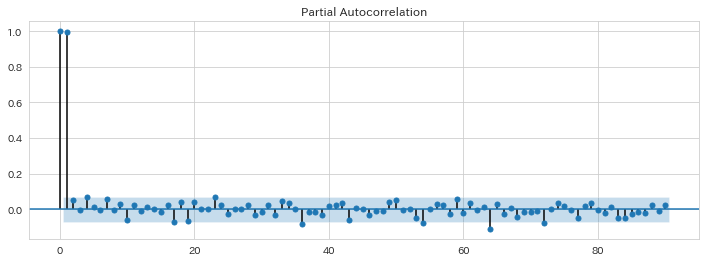

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_pacf(df["close"], lags=90, ax = ax1)

plt.show() # インライン表示で同じグラフが2個出でる？ので回避

# 定常化

In [ ]:
# 定常化と可視化

logdiff = np.diff(np.log(df["close"])) # 対数差収益率
diff = np.diff(df["close"]) # 1日ごとの差分
rcdiff = np.diff(df["close"]) / np.array(df.iloc[:-1, :]["close"]) # 変化率

df_1 = df.iloc[1:, :] # 差分をとるために、1行ずらしたデータセットを用意

df_1["対数差収益率"] = logdiff
df_1["差分"] = diff
df_1["変化率"] = rcdiff

df_1["経過日数"] = np.arange(start = 1, stop = len(df_1)+1)

df_1

<ipython-input-13-ce16449433a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["対数差収益率"] = logdiff
<ipython-input-13-ce16449433a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["差分"] = diff
<ipython-input-13-ce16449433a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,open,high,low,close,volume,date,対数差収益率,差分,変化率,経過日数
1,59.825001,59.938000,58.631500,58.896000,33030000,2019-10-02,-0.023559,-1.403999,-0.023284,1
2,59.167000,59.549999,58.157001,59.471500,28368000,2019-10-03,0.009724,0.575500,0.009771,2
3,59.714500,60.623001,59.548500,60.548000,24282000,2019-10-04,0.017939,1.076500,0.018101,3
4,60.349998,60.945499,60.217999,60.412498,17040000,2019-10-07,-0.002240,-0.135502,-0.002238,4
5,59.938499,60.343498,59.473999,59.506500,20086000,2019-10-08,-0.015110,-0.905998,-0.014997,5
...,...,...,...,...,...,...,...,...,...,...
801,99.400002,101.379997,99.000000,99.480003,24405100,2022-12-05,-0.009604,-0.959999,-0.009558,801
802,99.300003,99.779999,96.419998,96.980003,24910700,2022-12-06,-0.025452,-2.500000,-0.025131,802
803,96.410004,96.879997,94.720001,94.940002,31045400,2022-12-07,-0.021260,-2.040001,-0.021035,803
804,95.379997,95.580002,93.449997,93.709999,32213300,2022-12-08,-0.013040,-1.230003,-0.012956,804


経過日数 vs 対数差収益率


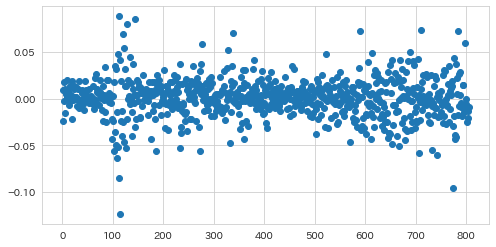

経過日数 vs 差分


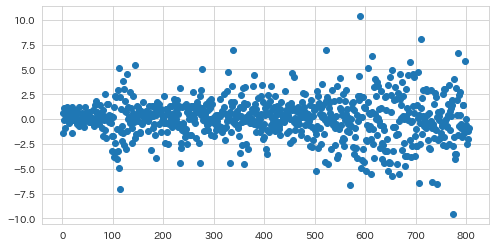

経過日数 vs 変化率


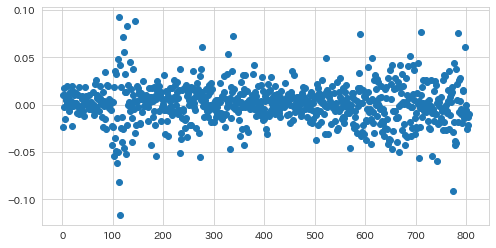

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df_1["経過日数"], df_1["対数差収益率"])
print("経過日数 vs 対数差収益率")
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df_1["経過日数"], df_1["差分"])
print("経過日数 vs 差分")
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df_1["経過日数"], df_1["変化率"])
print("経過日数 vs 変化率")
plt.show()

対数差収益率のヒストグラム


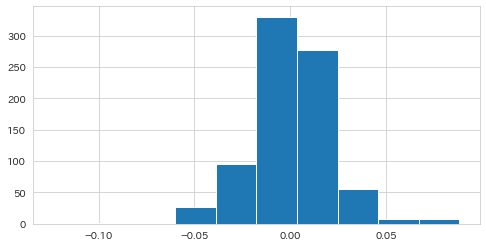

差分のヒストグラム


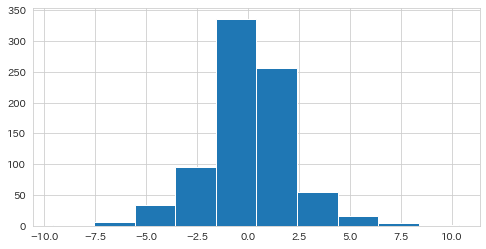

変化率のヒストグラム


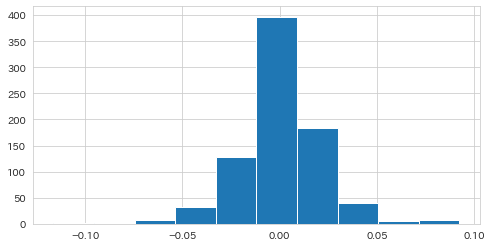

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df_1["対数差収益率"])
print("対数差収益率のヒストグラム")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df_1["差分"])
print("差分のヒストグラム")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df_1["変化率"])
print("変化率のヒストグラム")
plt.show()

- 変化率が良さそう

# ADF検定

In [ ]:
print('原系列:', adfuller(df_1["close"])[1])
print('対数差収益率:', adfuller(df_1["対数差収益率"])[1])
print('差分:', adfuller(df_1["差分"])[1])
print('変化率:', adfuller(df_1["変化率"])[1])

原系列: 0.5130809005593794
対数差収益率: 3.173675724567637e-15
差分: 0.0
変化率: 2.0273834564012698e-15


In [ ]:
adfuller(df_1["対数差収益率"])

(-9.122696016699148,
 3.173675724567637e-15,
 8,
 796,
 {'1%': -3.4385918508847646,
  '5%': -2.865177791819505,
  '10%': -2.568707096601096},
 -3826.412026274229)

In [ ]:
adfuller(df_1["対数差収益率"])[4]

{'1%': -3.4385918508847646,
 '5%': -2.865177791819505,
 '10%': -2.568707096601096}

- 原系列は、単位根過程でないといえない(差分系列が定常過程となるかもしれない）
- 定常化した系列は、単位根過程でない＝原系列が差分を取ることで定常過程になるかもしれない検定結果であるに加えて、単位根過程でなくなったので、これに時系列モデルの構築にトライする

# 定常化後データで自己相関を確認

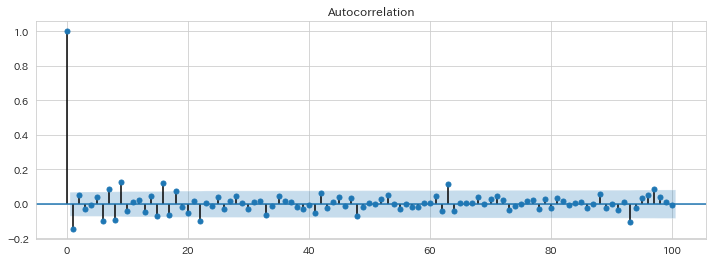

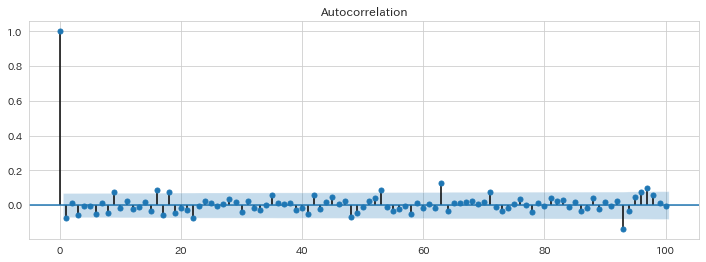

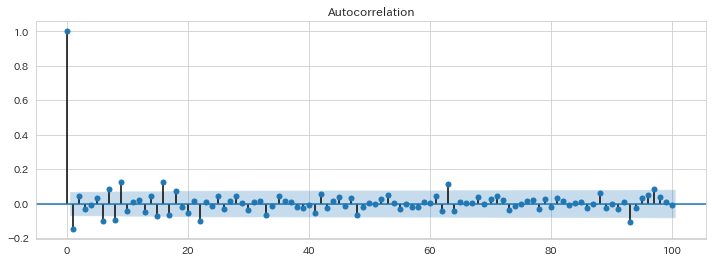

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_acf(df_1["対数差収益率"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_acf(df_1["差分"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_acf(df_1["変化率"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

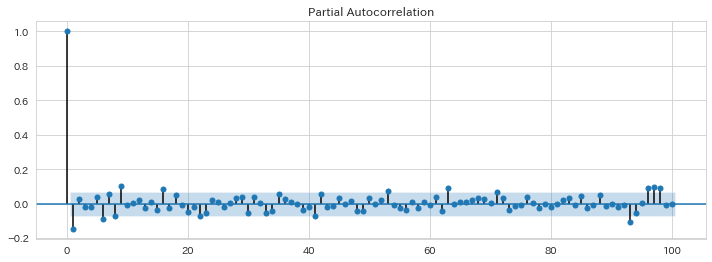

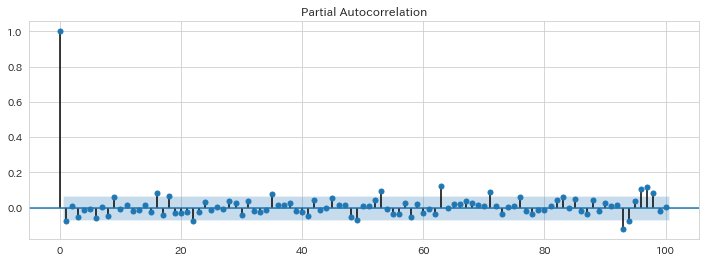

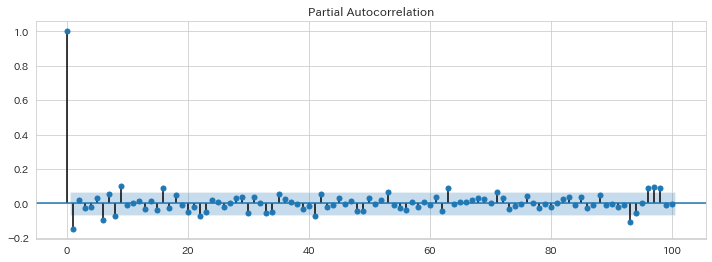

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_pacf(df_1["対数差収益率"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_pacf(df_1["差分"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
sm.graphics.tsa.plot_pacf(df_1["変化率"], lags=100, ax = ax)
plt.show() # インライン表示で同じグラフが2個出でる？ので回避

- 偏自己相関から一次までは相関あり

In [ ]:
# モデリング用データの出力
df_1.to_csv(f'{PATH_MYDRIVE}/株価データの分析/date/modeling_data.csv', encoding = "shift_jis")